In [2]:
import glob

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

import pandas as pd

from PIL import Image 
import matplotlib.pylab as plt

In [80]:
dicc_data = {
    'dia': [],
    'tipo': [],
    'titulo': [],
    'contenido': [],
    'tamanio': []
}

for file in glob.iglob('news/**/*.txt', recursive=True):
    listado = file.replace('/', '\\').split('\\')
    #print(listado)
    with open(file, encoding='UTF-8') as f:
        new = f.read()
        dicc_data['dia'].append(listado[1])
        dicc_data['tipo'].append(listado[2])
        dicc_data['titulo'].append(listado[-1].split('.')[0])
        dicc_data['contenido'].append(new)
        dicc_data['tamanio'].append(len(new.split(' ')))
        
data = pd.DataFrame(dicc_data)
del dicc_data
data.head(20)

,dia,tipo,titulo,contenido,tamanio
0,04072021,descartado,4-de-julio-en-estados-unidos-en-vivo-joe-biden...,"El presidente de Estados Unidos, Joe Biden, re...",466
1,04072021,descartado,4-de-julio-estados-unidos-se-asoma-a-la-normal...,Los estadounidenses celebraron este domingo su...,620
2,04072021,descartado,coronavirus-actualmente-hay-presentes-nueve-va...,Después de más de un año del comienzo de la pa...,466
3,04072021,descartado,coronavirus-argentina-en-vivo-hoy-domingo-04-d...,Argentina reportó este domingo 9.000 nuevos ca...,442
4,04072021,descartado,coronavirus-china-en-vivo-hoy-sabado-03-de-jul...,La Comisión Nacional de Sanidad de China anunc...,250
5,04072021,descartado,coronavirus-colombia-en-vivo-hoy-domingo-04-de...,Colombia reportó este domingo 582 muertes por ...,378
6,04072021,descartado,coronavirus-estados-unidos-antonhy-fauci-pide-...,El principal epidemiólogo del Gobierno de Esta...,490
7,04072021,descartado,coronavirus-la-quinta-oleada-de-la-covid-19-en...,La quinta oleada de la COVID-19 que afecta a I...,513
8,04072021,descartado,coronavirus-nicolas-maduro-le-pide-a-covax-env...,"El presidente de Venezuela, Nicolás Maduro, le...",405
9,04072021,descartado,coronavirus-rusia-en-vivo-hoy-domingo-4-de-jul...,Rusia registró este domingo 25.142 nuevos caso...,328


In [81]:
data['dia'] = pd.to_datetime(
    data['dia'], errors='coerce', format='%d%m%Y'
)
data.tail()

,dia,tipo,titulo,contenido,tamanio
216,2021-06-29,original,minsa-reporta-100-decesos-y-2422-nuevos-contag...,El Ministerio de Salud (Minsa) informó este lu...,256
217,2021-06-29,original,sistema-inmune-fortalecelo-comiendo-estos-alim...,La pandemia del nuevo coronavirus nos ha abier...,447
218,2021-06-29,original,vacuna-covid-19-mas-de-cuatro-millones-232-mil...,El Ministerio de Salud (Minsa) informó que has...,291
219,2021-06-29,original,vacuna-covid-19-mas-de-cuatro-millones-288-mil...,El Ministerio de Salud (Minsa) informó que has...,291
220,2021-06-29,original,variante-delta-de-covid-19-minsa-descarto-apli...,"El Instituto Nacional de Salud (INS), entidad ...",296


In [82]:
data['tipo'].unique()

array(['descartado', 'original'], dtype=object)

In [83]:
data['dia'].unique()

array(['2021-07-04T00:00:00.000000000', '2021-06-05T00:00:00.000000000',
       '2021-06-06T00:00:00.000000000', '2021-06-07T00:00:00.000000000',
       '2021-06-08T00:00:00.000000000', '2021-06-09T00:00:00.000000000',
       '2021-06-10T00:00:00.000000000', '2021-06-11T00:00:00.000000000',
       '2021-07-11T00:00:00.000000000', '2021-06-12T00:00:00.000000000',
       '2021-06-14T00:00:00.000000000', '2021-06-26T00:00:00.000000000',
       '2021-06-27T00:00:00.000000000', '2021-06-28T00:00:00.000000000',
       '2021-06-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [84]:
descarte = data[data['tipo'] == 'descartado']
data = data[data['tipo'] == 'original']

descarte.shape, data.shape

((22, 5), (199, 5))

In [85]:
tamnio = data.groupby(by=['dia']).agg({'tamanio': ['mean', 'min', 'max']}).sort_index().iloc[8:]
tamnio

tamanio           
                  mean  min   max
dia                              
2021-06-14  390.545455  219  1124
2021-06-26  391.142857  197  1511
2021-06-27  323.850000  197   566
2021-06-28  311.600000  242   473
2021-06-29  345.000000  247   504
2021-07-04  435.473684  155  1065
2021-07-11  333.181818  151   759

<AxesSubplot:xlabel='dia'>

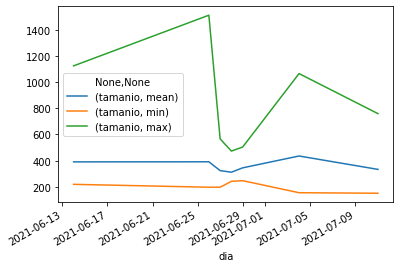

In [86]:
tamnio.plot()

In [87]:
contenido = data.groupby(by=['dia']).agg({
    'contenido': lambda _: '\n'.join(list(_)),
    'tamanio': 'sum'
}).sort_index().iloc[8:]
contenido

,contenido,tamanio
dia,,
2021-06-14,La ciudadanía puede verificar a través de la p...,4296
2021-06-26,El ministro de Salud Óscar Ugarte informó que ...,8214
2021-06-27,La Municipalidad de Cieneguilla inauguró este ...,6477
2021-06-28,En el marco de la segunda ola de contagios por...,1558
2021-06-29,¿Cómo saber si todavía puedo cobrar el Bono 60...,4485
2021-07-04,Un nuevo subsidio por parte del Estado podría ...,8274
2021-07-11,Los laboratorios Pfizer y BioNTech anunciaron ...,7330


<AxesSubplot:xlabel='dia'>

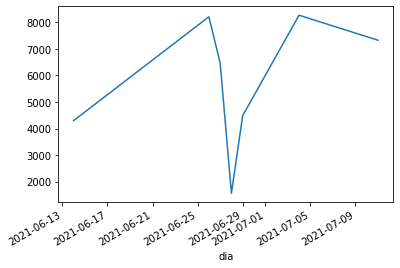

In [88]:
contenido.tamanio.plot()

In [74]:
contenido_descartado = descarte.groupby(by=['dia']).agg({'contenido': lambda _: '\n'.join(list(_))}).sort_index().iloc[0:]
contenido_descartado

,contenido
dia,
2021-07-04,"El presidente de Estados Unidos, Joe Biden, re..."
2021-07-11,Australia registró este domingo su primer muer...


contenido    El presidente de Estados Unidos, Joe Biden, re...
Name: 2021-07-04 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    Australia registró este domingo su primer muer...
Name: 2021-07-11 00:00:00, dtype: object <class 'pandas.core.series.Series'>


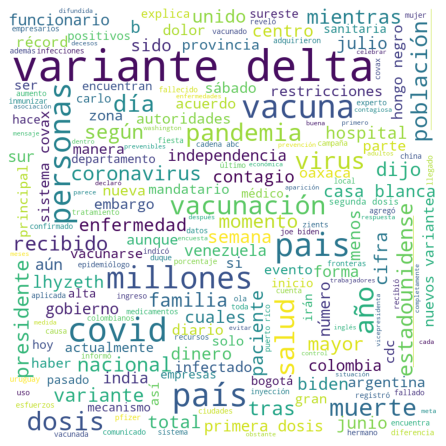

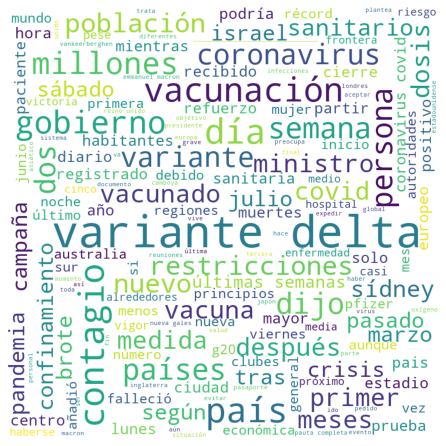

In [93]:
for row in contenido_descartado.iloc[-3:, :].iterrows():
    print(row[1], type(row[1]))
    comment_words = ''
    tokens = row[1]['contenido'].split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
    #comment_words = comment_words
    
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        stopwords=stopwords.words('spanish'),
        min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

contenido    ¿Cómo saber si todavía puedo cobrar el Bono 60...
Name: 2021-06-29 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    Un nuevo subsidio por parte del Estado podría ...
Name: 2021-07-04 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    Los laboratorios Pfizer y BioNTech anunciaron ...
Name: 2021-07-11 00:00:00, dtype: object <class 'pandas.core.series.Series'>


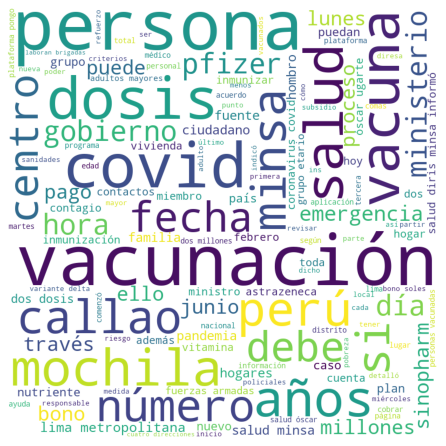

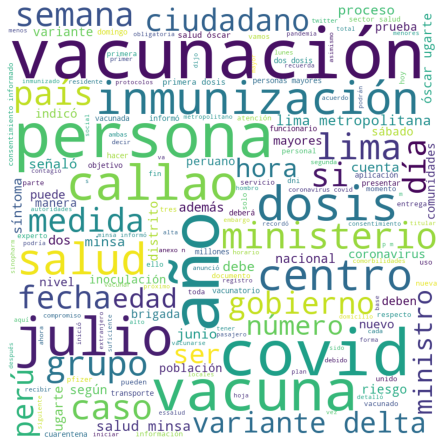

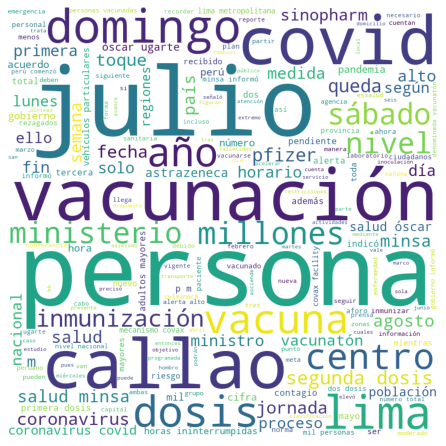

In [72]:
for row in contenido.iloc[-3:, :].iterrows():
    print(row[1], type(row[1]))
    comment_words = ''
    tokens = row[1]['contenido'].split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        stopwords=stopwords.words('spanish'),
        min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)